In [5]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Leemos nuestros datos
im = imageio.imread("./imagenes/s3/3.pgm")

# Definimos el tipo de número que tiene adentro nuestro archivo.
im = im.astype(np.uint8)

print(im)


[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [8]:
print('Max original', end=' ')
print(np.amax(im))
print('Min original', end=' ')
print(np.amin(im))

Max original 204
Min original 10


In [9]:
im_original = im

im = im / 255

print('Max original', end=' ')
print(np.amax(im))
print('Min original', end=' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


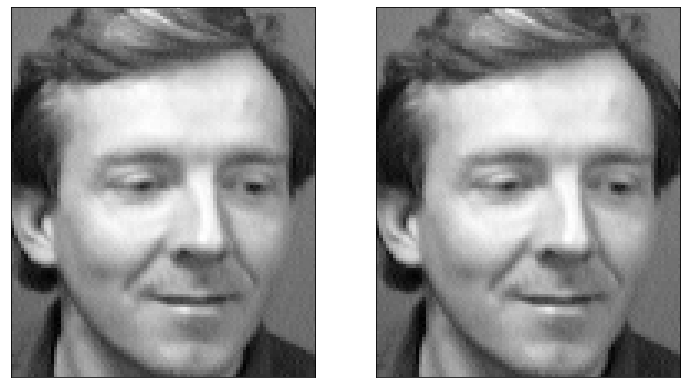

In [24]:
fix, ax = plt.subplots(1, 2, figsize=(12,12),
                     subplot_kw={'xticks': [], 'yticks': []})

ax[0].imshow(im_original, cmap="gray")
ax[1].imshow(im, cmap="gray")

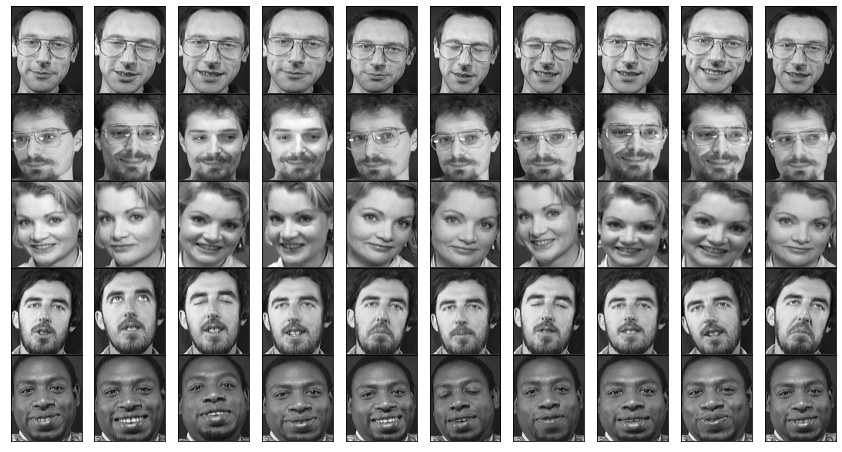

In [29]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('./imagenes/*/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)

fix, axes = plt.subplots(5, 10, figsize=(15,8),
                     subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap="gray")

In [30]:
from sklearn.decomposition import PCA


In [42]:
caras_pca = PCA(n_components=0.999)

caras_pca.fit(caras)

PCA(n_components=0.999)

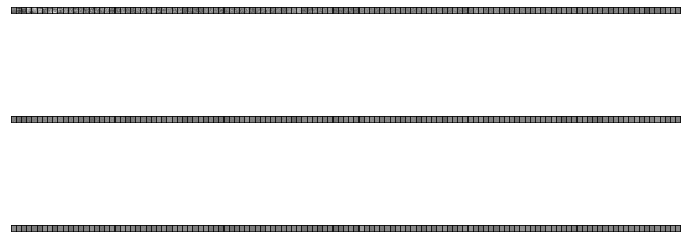

In [43]:
filas = 3
columnas = caras_pca.n_components_ // filas

fix, axes = plt.subplots(filas, columnas, figsize=(12,6),
                     subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap="gray")

In [44]:
print(caras_pca.n_components_)

388


In [45]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

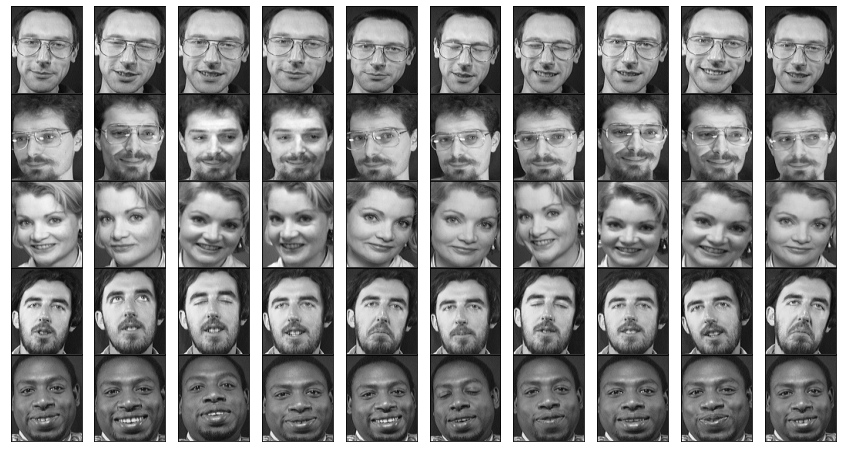

In [46]:
fix, axes = plt.subplots(5, 10, figsize=(15,8),
                     subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap="gray")